11493376/11490434 [==============================] - 1s 0us/step
Epoch 1/20
235/235 [==============================] - 10s 43ms/step - loss: 0.2684 - accuracy: 0.9173 - val_loss: 0.1525 - val_accuracy: 0.9499
Epoch 2/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0920 - accuracy: 0.9720 - val_loss: 0.0846 - val_accuracy: 0.9738
Epoch 3/20
235/235 [==============================] - 10s 43ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0728 - val_accuracy: 0.9768
Epoch 4/20
235/235 [==============================] - 12s 51ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0715 - val_accuracy: 0.9793
Epoch 5/20
235/235 [==============================] - 11s 48ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0680 - val_accuracy: 0.9799
Epoch 6/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0809 - val_accuracy: 0.9800
Epoch 7/20
235/235 [==============================] - 10s 43ms/step - los

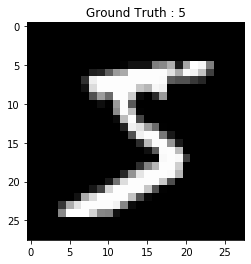

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


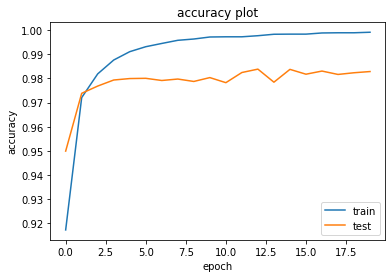

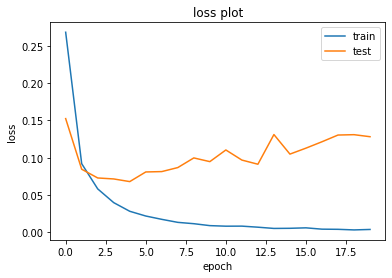

In [7]:
#1st question
#accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

[[3.0090300e-10 9.0578109e-12 3.2524167e-16 4.3355824e-10 7.6995290e-09
  1.0447195e-07 4.3428256e-17 6.6269897e-02 3.4541695e-10 9.3373001e-01]]
[9]


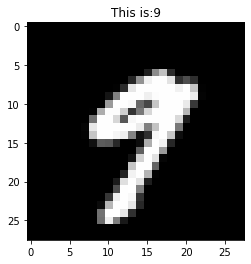

In [15]:
#2nd question
#loading and predicting the model
predictions = model.predict(test_data[[20],:])
print(predictions)

predict_classes = model.predict_classes(test_data[[20],:])
print(predict_classes)

plt.imshow(test_images[20], cmap = 'gray')
plt.title("This is:" + str(predict_classes[0]))
plt.show()

In [28]:
#3rd question
# from keras import Sequential
# from keras.datasets import mnist
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.layers import Dense
# from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
# Adding hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch 1/5
235/235 [==============================] - 14s 61ms/step - loss: 0.4198 - accuracy: 0.8990 - val_loss: 0.1400 - val_accuracy: 0.9602
Epoch 2/5
235/235 [==============================] - 17s 73ms/step - loss: 0.1120 - accuracy: 0.9692 - val_loss: 0.0981 - val_accuracy: 0.9727
Epoch 3/5
235/235 [==============================] - 9s 40ms/step - loss: 0.0698 - accuracy: 0.9804 - val_loss: 0.0886 - val_accuracy: 0.9744
Epoch 4/5
235/235 [==============================] - 11s 45ms/step - loss: 0.0504 - accuracy: 0.9857 - val_loss: 0.0882 - val_accuracy: 0.9753
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0689 - accuracy: 0.9810
Evaluation result on Test Data : Loss = 0.06885509192943573, accuracy = 0.9810000061988831


In [27]:
#4th question
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
# train_data /=255.0
# test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch 1/20
235/235 [==============================] - 9s 39ms/step - loss: 7.2058 - accuracy: 0.8697 - val_loss: 1.0525 - val_accuracy: 0.8992
Epoch 2/20
235/235 [==============================] - 11s 46ms/step - loss: 0.4207 - accuracy: 0.9470 - val_loss: 0.6440 - val_accuracy: 0.9229
Epoch 3/20
235/235 [==============================] - 12s 52ms/step - loss: 0.2464 - accuracy: 0.9617 - val_loss: 0.3732 - val_accuracy: 0.9499
Epoch 4/20
235/235 [==============================] - 15s 64ms/step - loss: 0.1865 - accuracy: 0.9686 - val_loss: 0.2719 - val_accuracy: 0.9584
Epoch 5/20
235/235 [==============================] - 14s 61ms/step - loss: 0.1587 - accuracy: 0.9726 - val_loss: 0.4401 - val_accuracy: 0.9534
Epoch 6/20
235/235 [==============================] - 12s 50ms/step - loss: 0.1495 - accuracy: 0.9758 - val_loss: 0.3495 - val_accuracy: 0.9659
Epoch 7/20
235/235 [==============================] - 10s 41ms/step - loss: 0.1290 - accuracy: 0.9796 - val_loss: 0.4060 - val_accuracy: 